In [32]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from pathlib import Path
#1.모듈로딩

In [ ]:
batch_size=128
learning_rate=1e-4
epochs=100
 #2.하이퍼 파라미터

dir = Path.joinpath(list(Path.cwd().parents)[2], "00. DeepLearning/00_Dataset")
ds_train = torchvision.datasets.MNIST(root=dir, 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)
ds_test = torchvision.datasets.MNIST(root=dir, 
                                     train=False, 
                                     transform=transforms.ToTensor(),
                                     download=True)

dl_train=torch.utils.data.DataLoader(ds_train,batch_size,shuffle=True,drop_last=False)
dl_test=torch.utils.data.DataLoader(ds_test,batch_size,shuffle=True,drop_last=False)
#3.dataset정의

fig, axes = plt.subplots(1,10,figsize=(20, 2))
for i in range(10):
    img = ds_train[i][0]
    label = ds_train[i][1]
    axes[i].imshow(img.squeeze(), cmap='gray')

conv = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=128, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Flatten()
)

input = torch.ones((1,1,28,28), dtype=torch.float32)
out = conv(input)
conv_out_size = torch.numel(out)
print(conv_out_size)

lin = nn.Sequential(
    nn.Linear(in_features=128, out_features=128),
    nn.ReLU(),
    nn.Dropout(0.5),  # 드롭아웃 추가
    nn.Linear(in_features=128, out_features=10)
)

model = nn.Sequential(conv,lin)
out = model(input)

#4.NN정의

device = 'cuda' if torch.cuda.is_available() else 'cpu'
def evaluate(data_loader):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    model.train()
    return accuracy

opt = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_criterion = torch.nn.CrossEntropyLoss()
#6.opt & loss_criterion

model = model.to(device)

losses = []
for epoch in range(epochs):
    loss_avg = 0
    for i, (imgs, targets) in enumerate(dl_train):
        imgs, targets = imgs.to(device), targets.to(device)
        out = model(imgs)
        loss = loss_criterion(out, targets)
        opt.zero_grad()
        loss.backward()
        opt.step()
        loss_avg += loss.item()
    loss_avg = loss_avg / (i + 1)
    losses.append(loss_avg)
    if (epoch+1)%10==0:
        acc=evaluate(dl_test)
        print(f"Epoch {epoch + 1}; acc: {acc:.4f}")
    print(f"Epoch {epoch + 1}; Loss: {loss_avg:.4f}")
#7.train & 8.evaluation

In [34]:
dir = Path.joinpath(list(Path.cwd().parents)[2], "00. DeepLearning/00_Dataset")
ds_train = torchvision.datasets.MNIST(root=dir, 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)
ds_test = torchvision.datasets.MNIST(root=dir, 
                                     train=False, 
                                     transform=transforms.ToTensor(),
                                     download=True)

dl_train=torch.utils.data.DataLoader(ds_train,batch_size,shuffle=True,drop_last=False)
dl_test=torch.utils.data.DataLoader(ds_test,batch_size,shuffle=True,drop_last=False)
#3.dataset정의

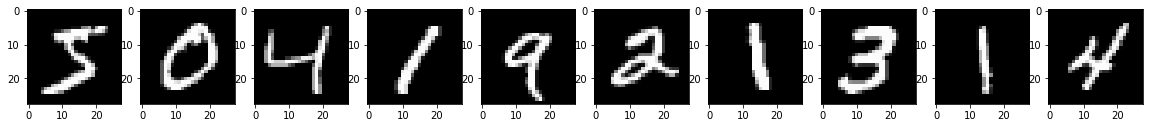

In [35]:
fig, axes = plt.subplots(1,10,figsize=(20, 2))
for i in range(10):
    img = ds_train[i][0]
    label = ds_train[i][1]
    axes[i].imshow(img.squeeze(), cmap='gray')

In [36]:
conv = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=128, kernel_size=3, stride=2, padding=1), #14x14
    nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=2, padding=1), #7x7
    nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=2, padding=1),  #4x4
    nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=2, padding=1),  #2x2
    nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=2, padding=1),  #1x1
    nn.Flatten(),
    nn.Linear(in_features=128, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=10),
)

input = torch.ones((1,1,28,28), dtype=torch.float32)
out = conv(input)
conv_out_size = torch.numel(out)
print(conv_out_size)

lin = nn.Sequential(
    nn.Linear(in_features=conv_out_size, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=10),
)

model = nn.Sequential(conv,lin)
out = model(input)

#4.NN정의

10


In [37]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
def evaluate(data_loader):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    model.train()
    return accuracy

In [38]:
opt = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_criterion = torch.nn.CrossEntropyLoss()
#6.opt & loss_criterion

model = model.to(device)

losses = []
for epoch in range(epochs):
    loss_avg = 0
    for i, (imgs, targets) in enumerate(dl_train):
        imgs, targets = imgs.to(device), targets.to(device)
        out = model(imgs)
        loss = loss_criterion(out, targets)
        opt.zero_grad()
        loss.backward()
        opt.step()
        loss_avg += loss.item()
    loss_avg = loss_avg / (i + 1)
    losses.append(loss_avg)
    if (epoch+1)%10==0:
        acc=evaluate(dl_test)
        print(f"Epoch {epoch + 1}; acc: {acc:.4f}")
    print(f"Epoch {epoch + 1}; Loss: {loss_avg:.4f}")
#7.train & 8.evaluation

Epoch 1; Loss: 0.7913
Epoch 2; Loss: 0.3141
Epoch 3; Loss: 0.2430
Epoch 4; Loss: 0.2034
Epoch 5; Loss: 0.1748
Epoch 6; Loss: 0.1539
Epoch 7; Loss: 0.1392
Epoch 8; Loss: 0.1255
Epoch 9; Loss: 0.1146
Epoch 10; acc: 0.9655
Epoch 10; Loss: 0.1071
Epoch 11; Loss: 0.1002
Epoch 12; Loss: 0.0928
Epoch 13; Loss: 0.0874
Epoch 14; Loss: 0.0824
Epoch 15; Loss: 0.0793
Epoch 16; Loss: 0.0733
Epoch 17; Loss: 0.0715
Epoch 18; Loss: 0.0682
Epoch 19; Loss: 0.0650
Epoch 20; acc: 0.9742
Epoch 20; Loss: 0.0622
Epoch 21; Loss: 0.0589
Epoch 22; Loss: 0.0576
Epoch 23; Loss: 0.0548
Epoch 24; Loss: 0.0533
Epoch 25; Loss: 0.0508
Epoch 26; Loss: 0.0487
Epoch 27; Loss: 0.0464
Epoch 28; Loss: 0.0445
Epoch 29; Loss: 0.0441
Epoch 30; acc: 0.9762
Epoch 30; Loss: 0.0420
Epoch 31; Loss: 0.0390
Epoch 32; Loss: 0.0399
Epoch 33; Loss: 0.0371
Epoch 34; Loss: 0.0367
Epoch 35; Loss: 0.0345
Epoch 36; Loss: 0.0334
Epoch 37; Loss: 0.0327
Epoch 38; Loss: 0.0313
Epoch 39; Loss: 0.0300
Epoch 40; acc: 0.9775
Epoch 40; Loss: 0.0305
E

KeyboardInterrupt: 